In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv("Iris.csv")[['SepalLengthCm', 'PetalLengthCm']]
df

SepalLengthCm  PetalLengthCm
0              5.1            1.4
1              4.9            1.4
2              4.7            1.3
3              4.6            1.5
4              5.0            1.4
..             ...            ...
145            6.7            5.2
146            6.3            5.0
147            6.5            5.2
148            6.2            5.4
149            5.9            5.1

[150 rows x 2 columns]

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

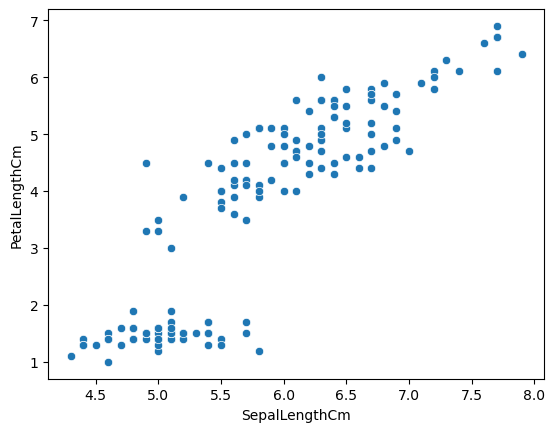

In [16]:
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm')

In [17]:
M = len(df)
M

150

In [18]:
X = df['SepalLengthCm'].to_numpy(dtype=np.float64)
y = df['PetalLengthCm'].to_numpy(dtype=np.float64)

In [19]:
def dJdw(w, b):
    return (-2 / M) * sum((xi*(yi - w*xi - b)) for xi, yi in zip(X, y))

def dJdb(w, b):
    return (-2 / M) * sum((yi - w*xi - b) for xi, yi in zip(X, y))

In [20]:
ITERATIONS = 100000
GAMMA = 0.02

In [21]:
w = 0
b = 0

In [22]:
for _ in range(ITERATIONS):
    w = w - GAMMA * dJdw(w, b)
    b = b - GAMMA * dJdb(w, b)

In [23]:
w, b

(1.8575096654213474, -7.095381478278729)

In [24]:
@np.vectorize
def f(x):
    return w * x + b

In [25]:
lineX = np.linspace(X.min(), X.max(), num=100)
lineY = f(lineX)

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

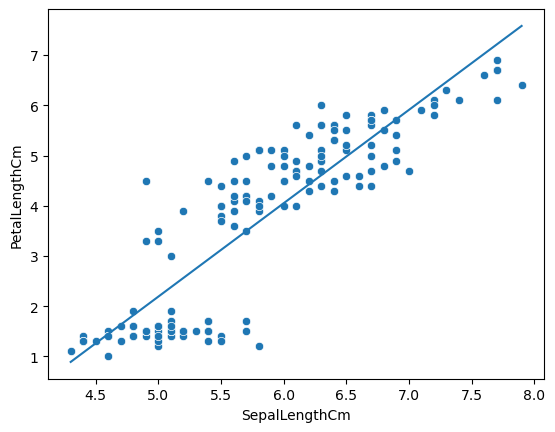

In [26]:
sns.scatterplot(data=df, x='SepalLengthCm', y='PetalLengthCm')
sns.lineplot(x=lineX, y=lineY)